In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/ML course/files/DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Большинство колонок являются категориальными переменными

---
---

### Разведочный анализ
---


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Посмотрим на сбалансированность классов Churn

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

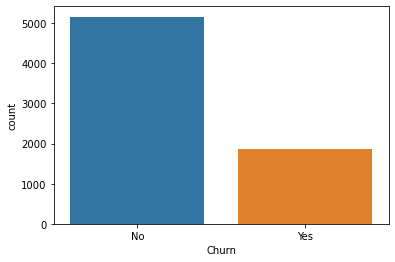

In [9]:
sns.countplot(df.Churn)

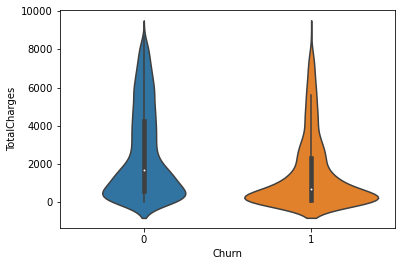

In [109]:
sns.violinplot(data = df, x = 'Churn', y = 'TotalCharges');

Видно, что классы несбалансированы. Причем, у ушедших клиентов медианная потраченная сумма меньше, чем у оставшихся

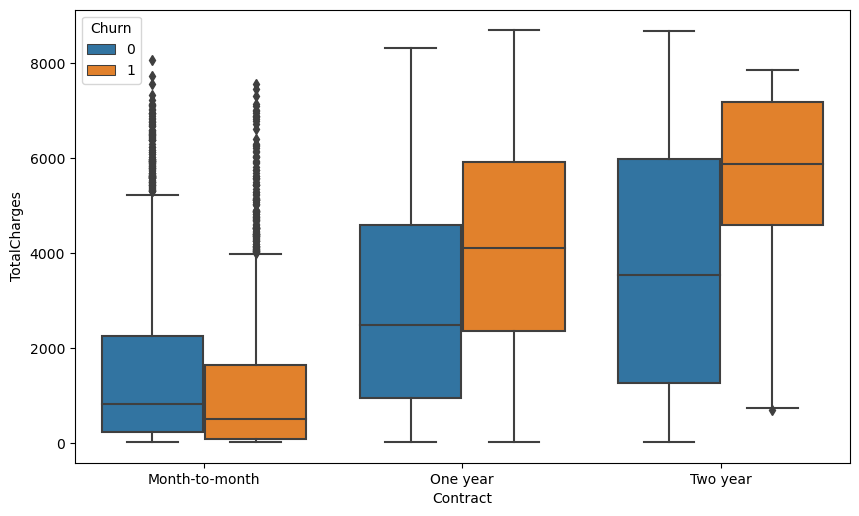

In [104]:
plt.figure(figsize = (10,6), dpi = 100)
sns.boxplot(data = df, x = 'Contract', y = 'TotalCharges', hue = 'Churn');

По полученным графикам видно, что ушедшие клиенты, взявшие контракт на год и более, платили большую сумму за продукт, чем оставшиеся. Вероятно, возможной причиной оттока могла стать цена за услуги.  \
При этом, большинво ушедших клиентов, которые взяли контракт на месяц, платили меньше, чем оставшиеся. Скорее всего они сразу поняли, что им не подходит продукт.


Посмотрим на корелляцию признаков с переменной Churn

In [20]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

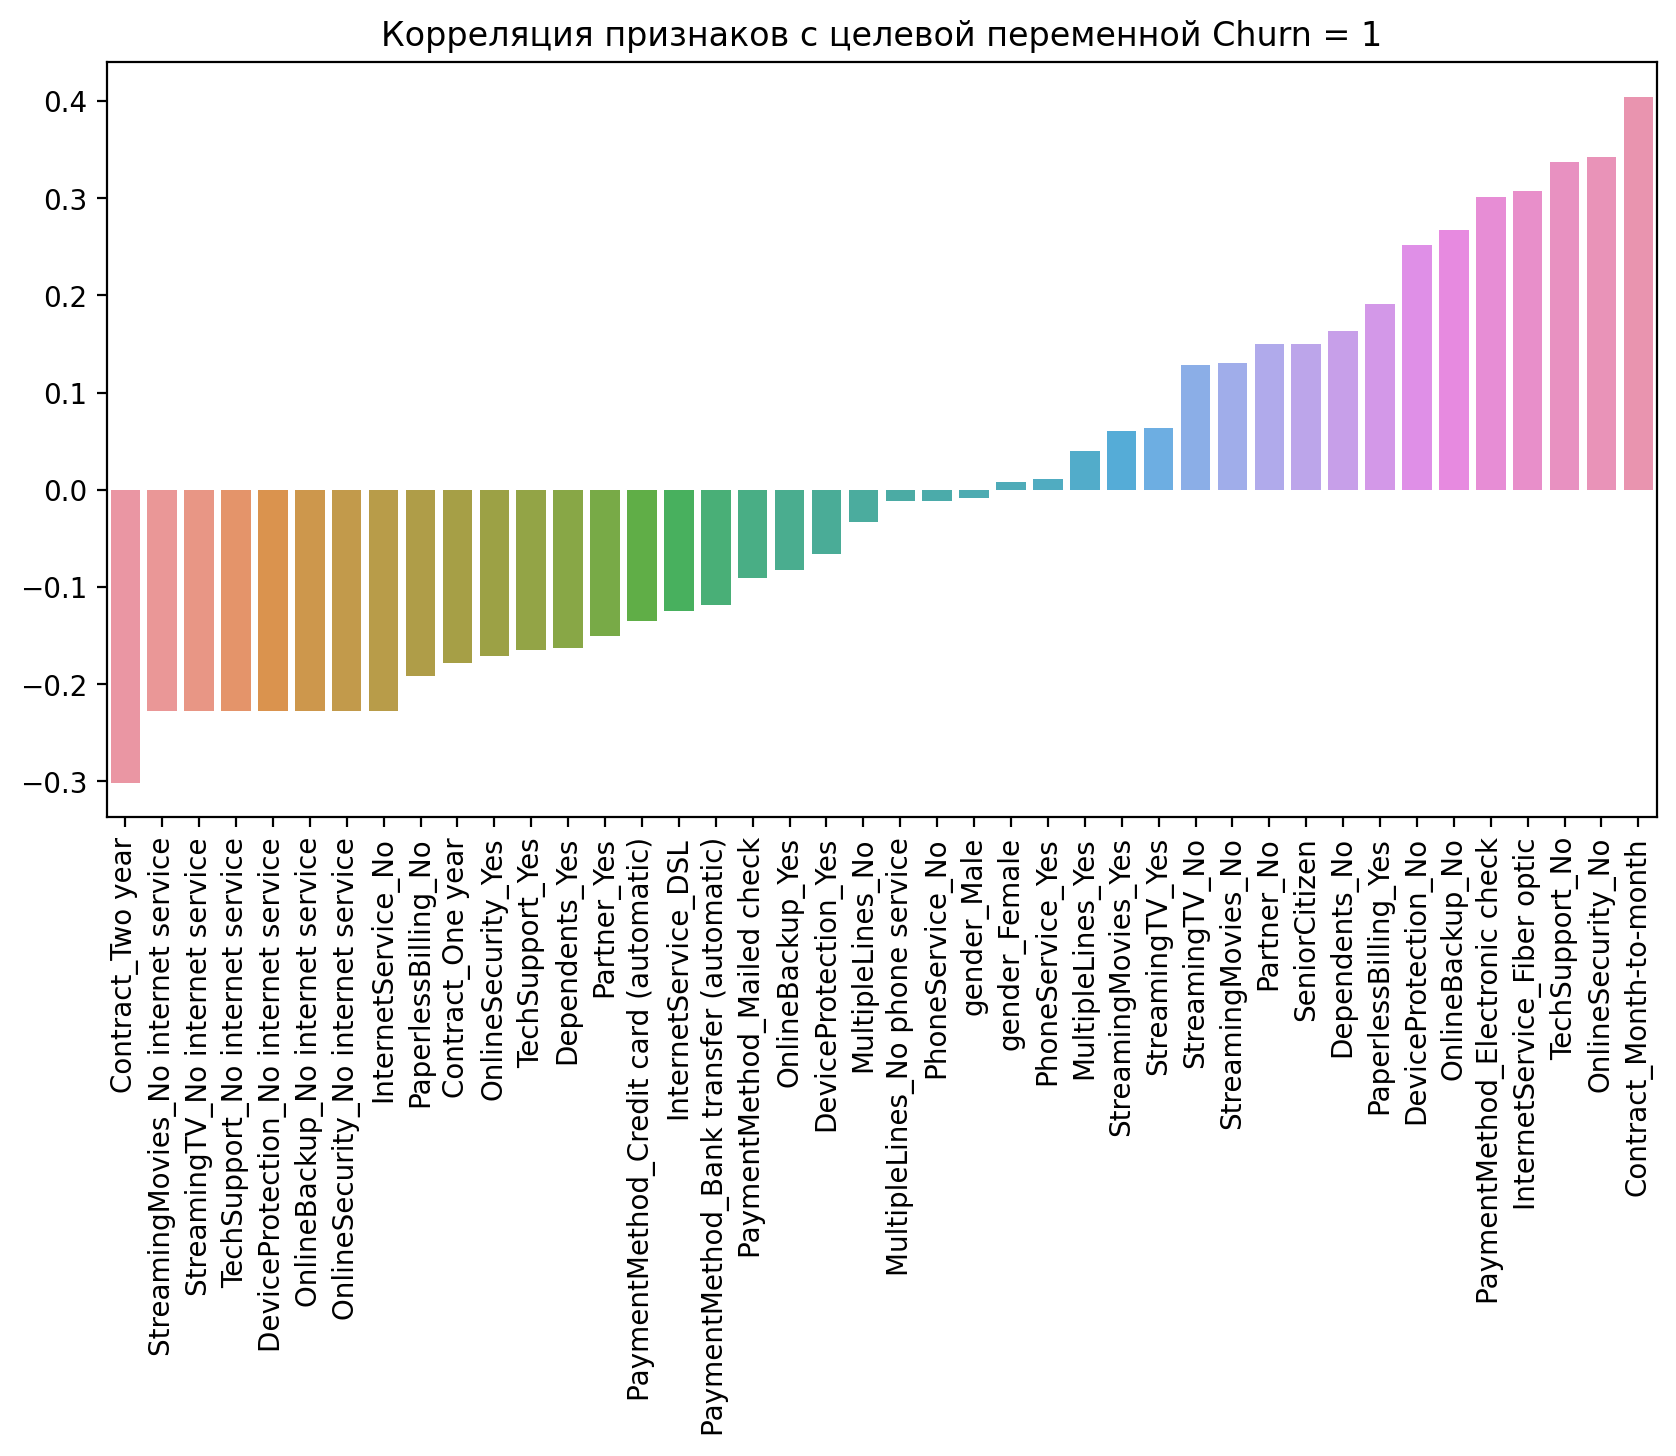

In [112]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Корреляция признаков с целевой переменной Churn = 1")
plt.xticks(rotation=90);

Самая сильная корелляция с контрактом на месяц.  \
Также, у ушедшишх пользователей не была подключена защита и техническая поддержка.

---
---

###  Анализ оттока



In [23]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

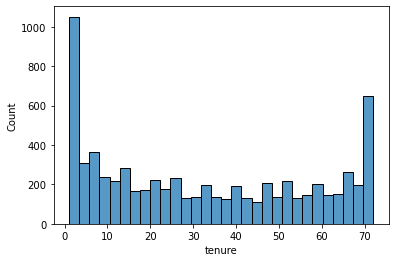

In [103]:
sns.histplot(data = df, x ='tenure', bins=30);

<Figure size 1440x720 with 0 Axes>

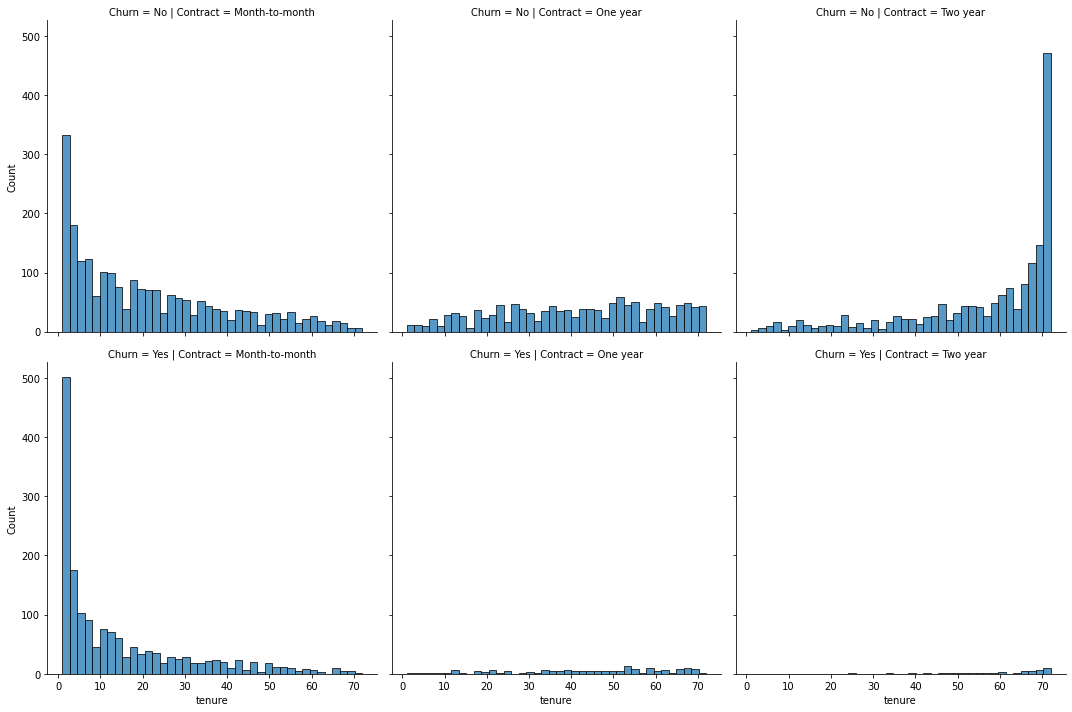

In [24]:
plt.figure(figsize = (12,6), dpi=120)
sns.displot(data = df,x = 'tenure', bins = 40, col = 'Contract', row ='Churn');

Больший отток наблюдается на тех клиентах, которые взяли контракт на месяц. Пользователи, бравшие контракт более чем на два года практически не уходят.

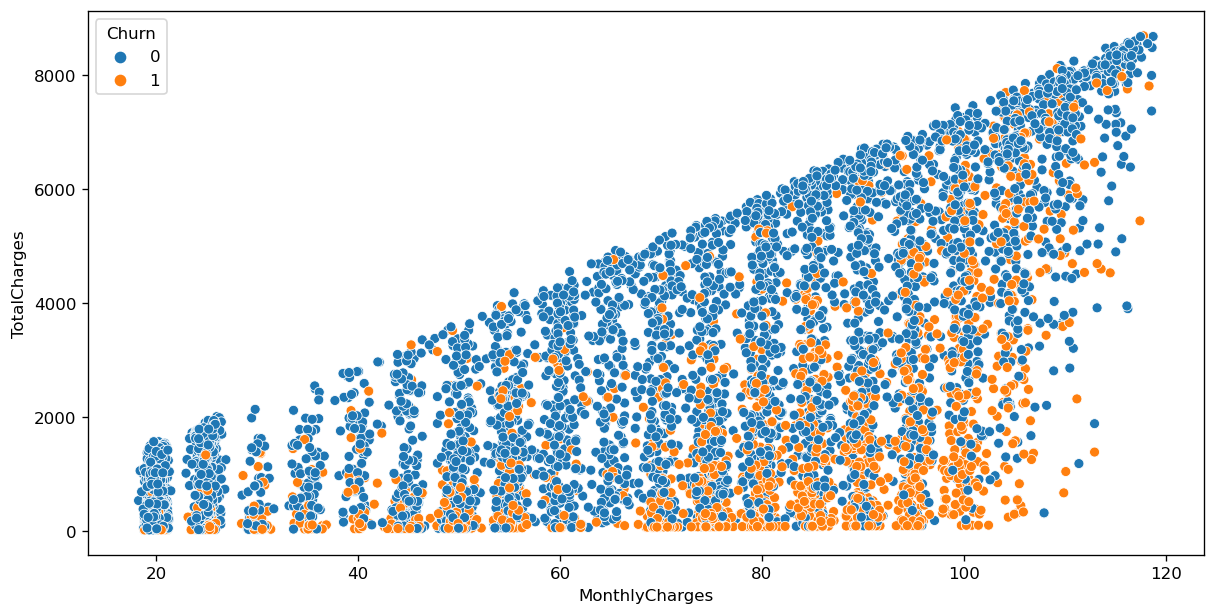

In [102]:
plt.figure(figsize = (12,6), dpi=120)
sns.scatterplot(data=df, x = 'MonthlyCharges',y = 'TotalCharges', hue = 'Churn');

Ушедшие пользователи в сравнении с оставшимися в месяц платили большую сумму за услуги.

---
---
### Когортный анализ
---
Создадим когорты по колонке Tenure

In [30]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [31]:
df.Churn=pd.get_dummies(df.Churn, drop_first=True)

In [33]:
tenure=df.groupby('tenure')['Churn'].agg('sum')/df.groupby('tenure')['Churn'].agg('count')*100

In [34]:
tenure

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64

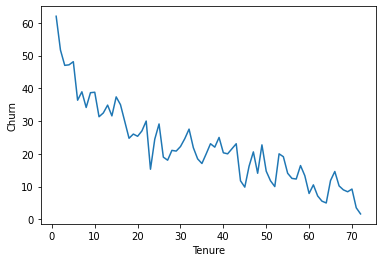

In [37]:
plt.plot(tenure.index,tenure.values)
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.show()

#### Разделим данные на более крупные когорты по следующим категориям
   * 0 - 12 месяцев
   * 24 - 48 месяцев
   * 12 - 24 месяцев
   * Более 48 месяцев    

In [38]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [39]:
df['tenure_cohort'] = df['tenure'].apply(cohort)

In [40]:
df.head(10)[['tenure','tenure_cohort']]

,tenure,tenure_cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


In [42]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_cohort'],
      dtype='object')

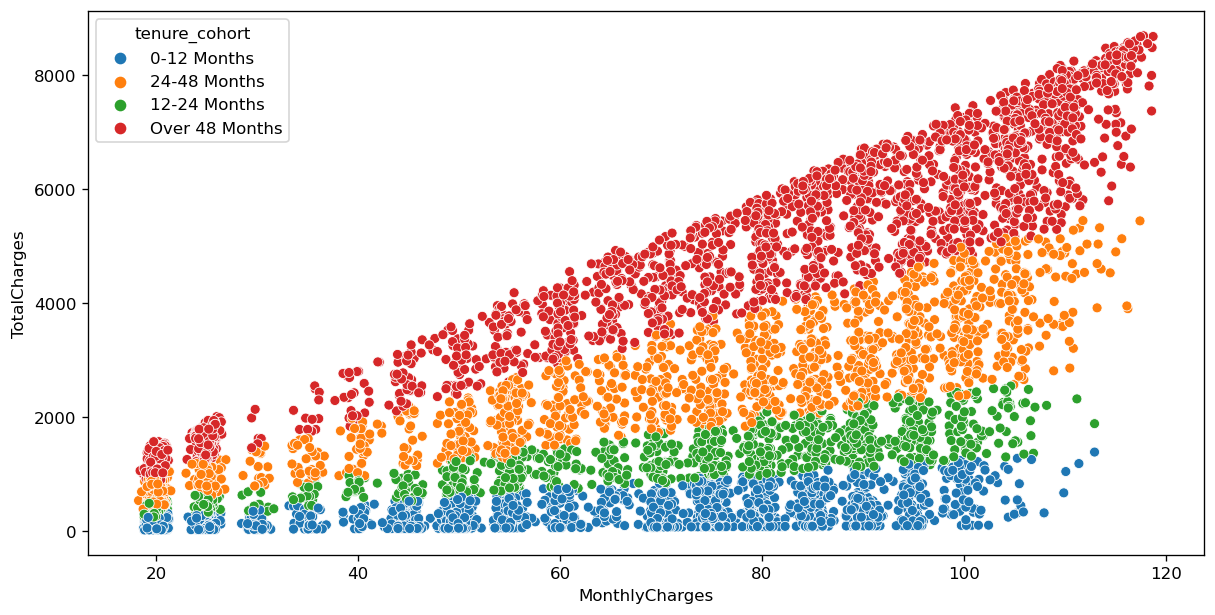

In [52]:
plt.figure(figsize=(12,6), dpi=120)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='tenure_cohort');

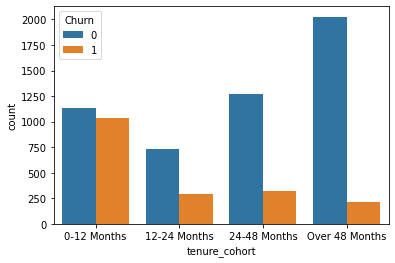

In [114]:
sns.countplot(data=df.sort_values(by = 'tenure_cohort'), x='tenure_cohort', hue='Churn');

Наблюдается небольшая разница оттока между когортой 12-24 и 24-48 месяцев. Чтобы удержать пользователей когорты 12-24 месяцев, можно предложить им пресонализированные скидки на продукт.

In [58]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Figure size 1200x480 with 0 Axes>

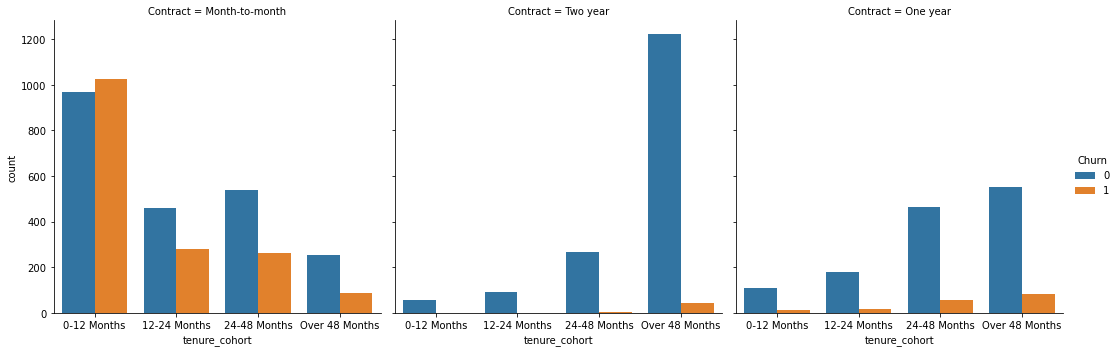

In [115]:
plt.figure(figsize=(10,4), dpi= 120);
sns.catplot(data= df.sort_values(by = 'tenure_cohort'), x='tenure_cohort', hue='Churn', col='Contract', kind='count');

Также людям, пользовавшимся продуктом более года и бравшим в это время контракт на месяц, можно предложить более выгодные условия контракта.

---
---
### Построение предсказательной модели
---
Сравним работу моделей дерева решений, случайного леса и градиентного бустинга

Разделим данные на тестовую и обучающую выборки

In [70]:
from sklearn.model_selection import train_test_split
y = df.Churn
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### Рассмотрим модель дерева решений

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
model_des_tree = DecisionTreeClassifier(max_depth=6)


In [73]:
model_des_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [74]:
preds = model_des_tree.predict(X_test)

In [75]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



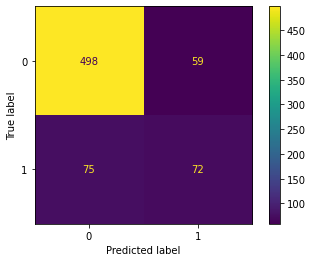

In [76]:
plot_confusion_matrix(model_des_tree,X_test,y_test)

In [77]:
imp_feats = pd.DataFrame(data=model_des_tree.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values("Feature Importance")

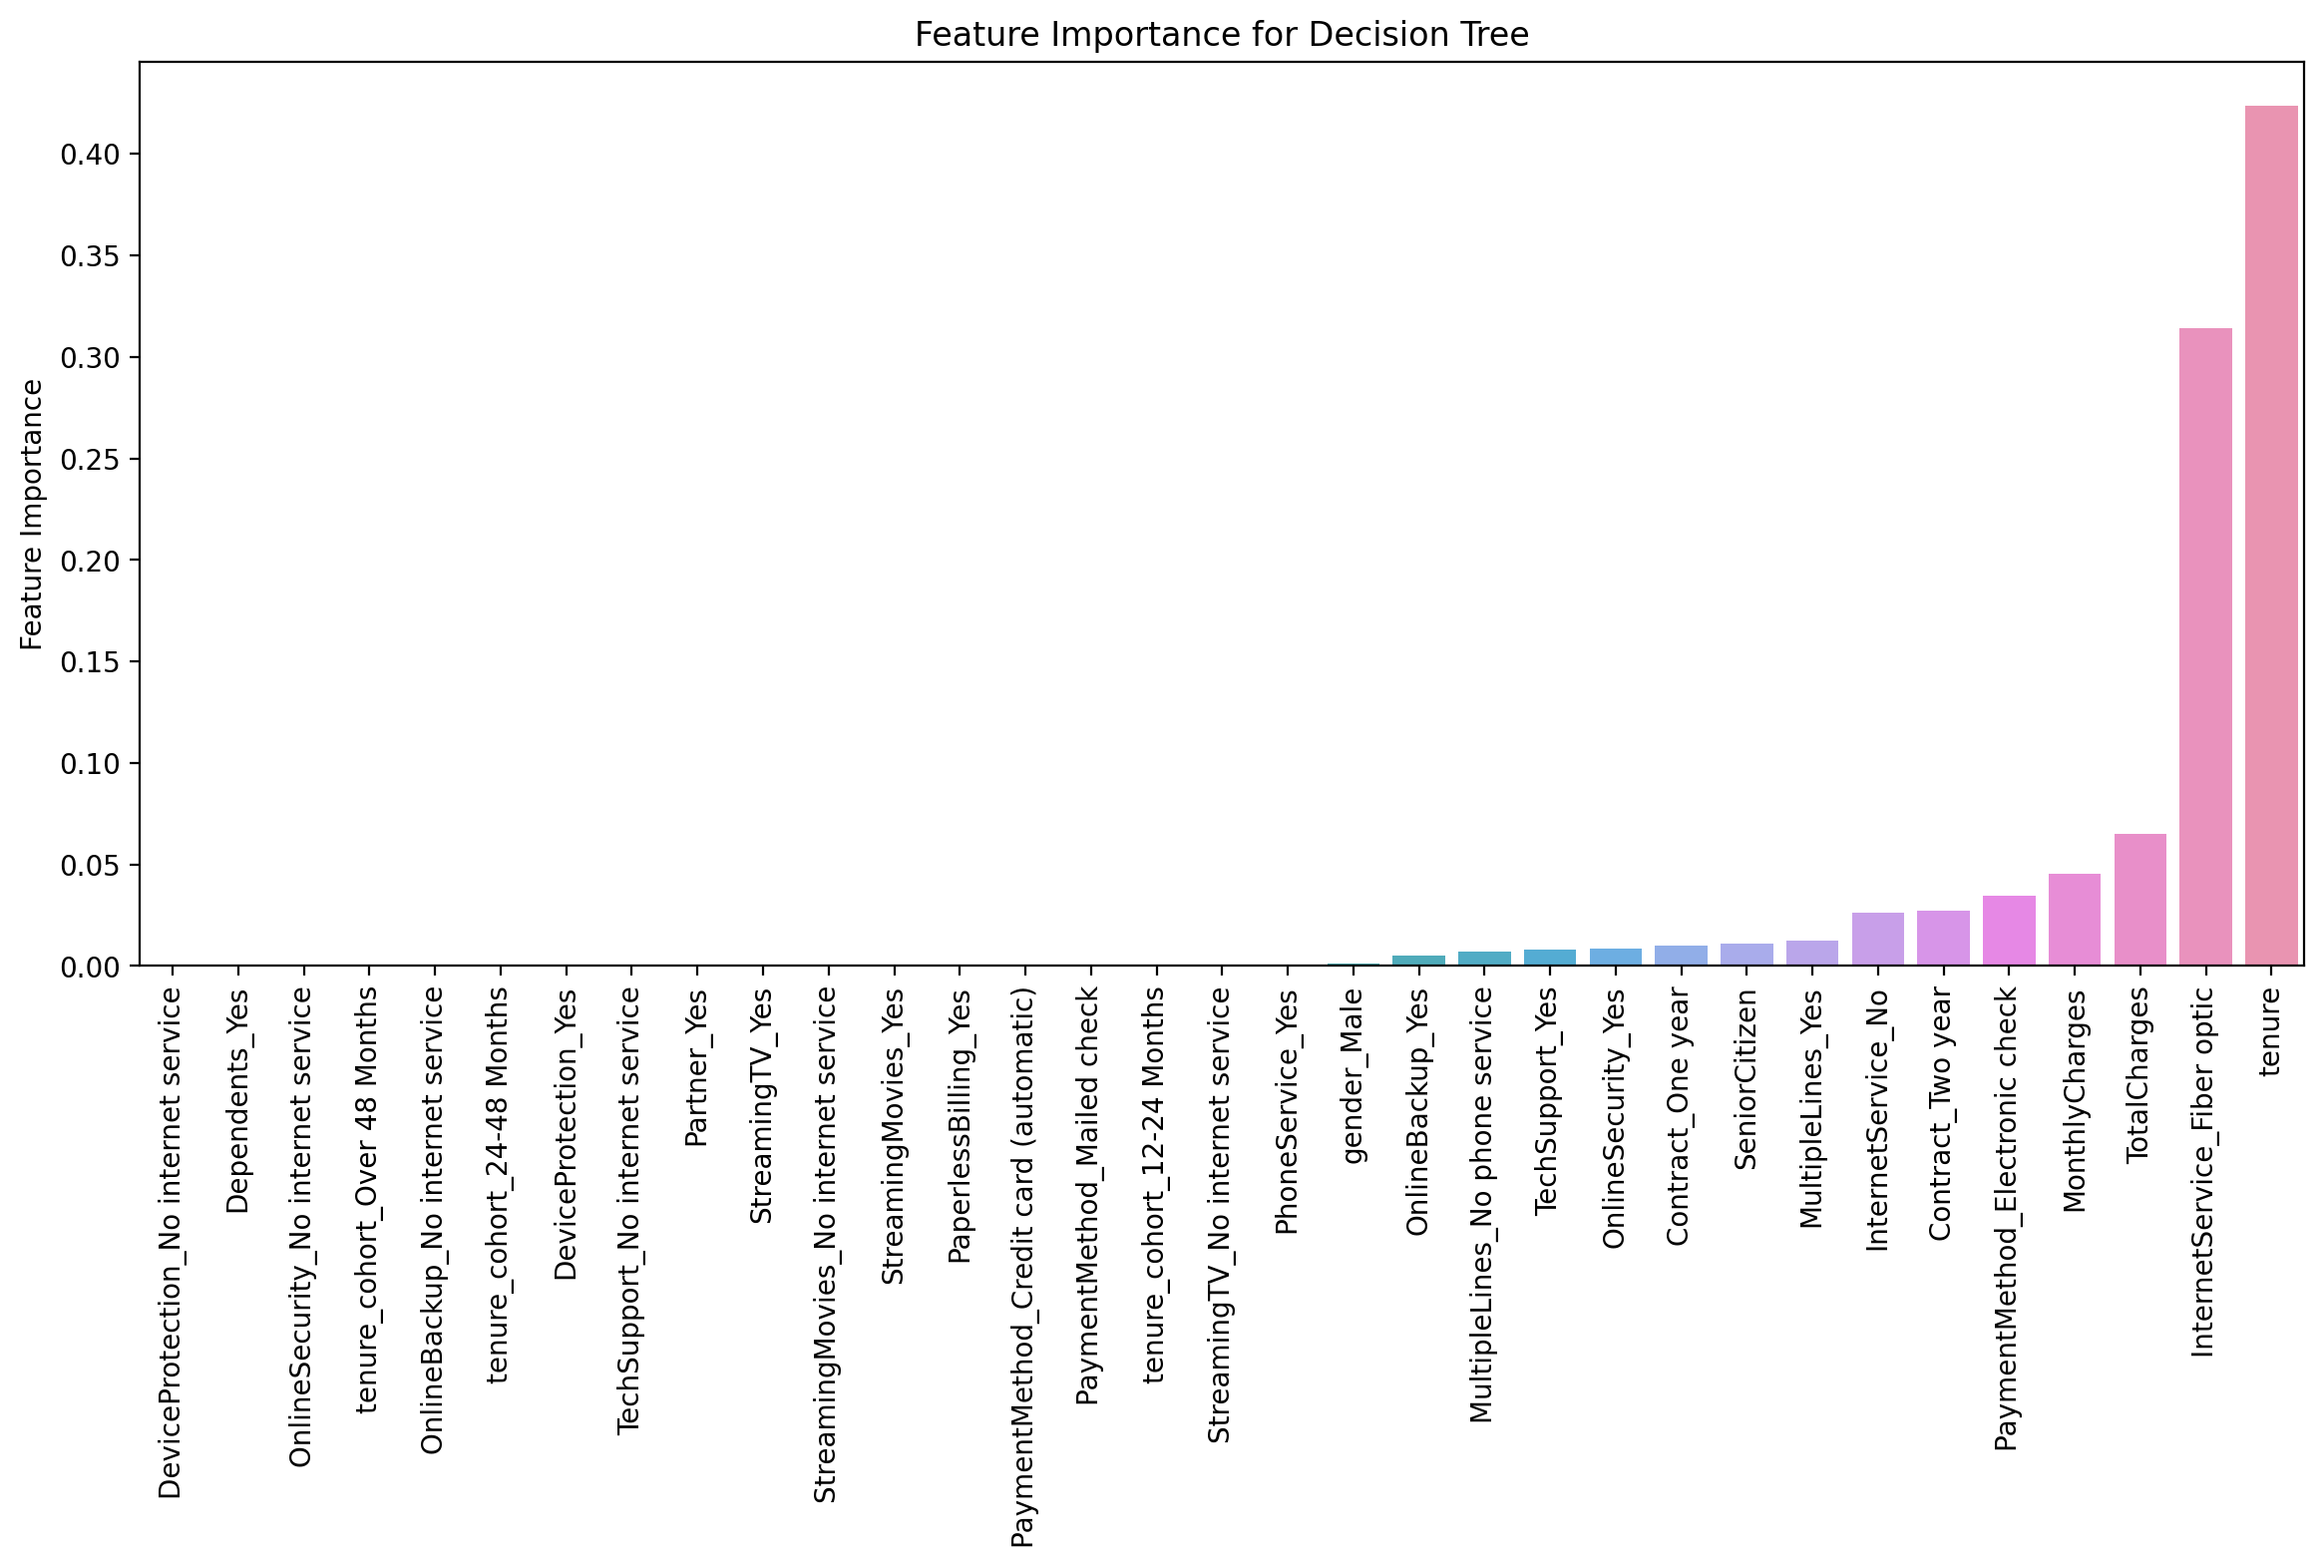

In [82]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'), x=imp_feats.sort_values('Feature Importance').index, y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [79]:
model_des_tree.feature_importances_

array([0.01082504, 0.42391407, 0.04534099, 0.06494213, 0.00123697,
       0.        , 0.        , 0.00088963, 0.00696195, 0.01243191,
       0.31406016, 0.02628952, 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

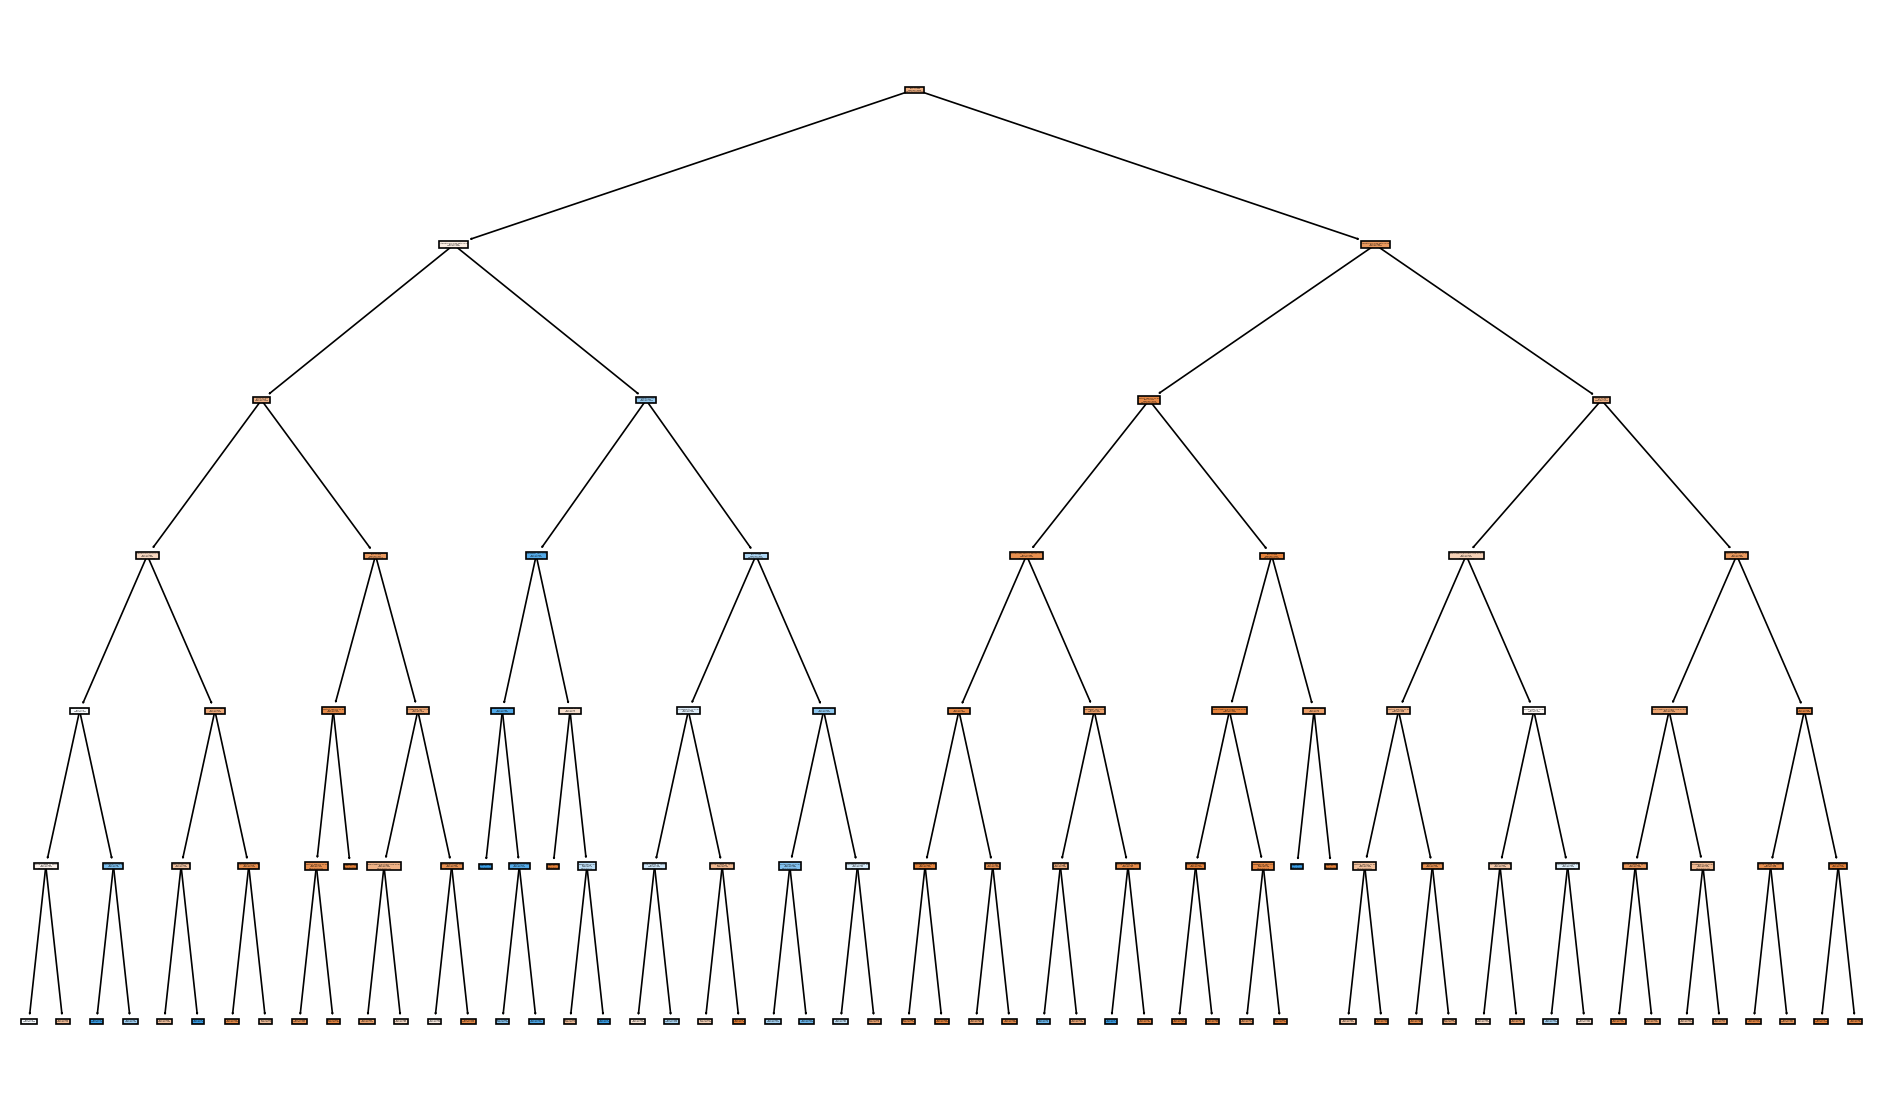

In [89]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 12), dpi = 120)
plot_tree(model_des_tree, filled=True ,feature_names=X.columns);

#### Рассмотрим модель случайного леса

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
y_pred = random_forest.predict(X_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       557
           1       0.51      0.48      0.50       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.69       704
weighted avg       0.79      0.80      0.79       704



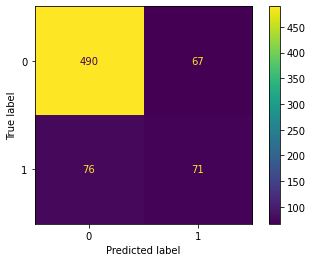

In [96]:
plot_confusion_matrix(random_forest, X_test, y_test);

#### Рассмотрим модель градиентного бустинга

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [99]:
y_pred = gradient_boosting.predict(X_test)

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



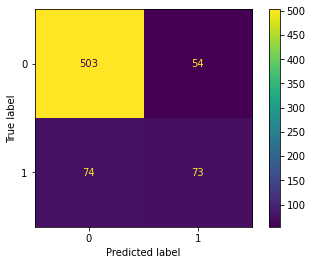

In [101]:
plot_confusion_matrix(gradient_boosting, X_test, y_test);

По результатам работы трех моделей лучший показатель accuracy у градиентного бустинга. Примем эту модель за предсказательную.

Сохраним модель

In [106]:
from joblib import dump
dump(gradient_boosting, 'churn_rate_model.joblib') 

['churn_rate_model.joblib']